# **Business Problem:**
 ***Predict the percentage of student's score based on the number of hours dedicated for studying***

# **Data Science Problem:**
 ***Build a linear regression model based on the source data consisting of two features (input variable and output variable) to predict the score of student bsed on input variable "Hours Studied"***
 * Hours Studied - Input Variable (X)
 * Percentage Scored - Output Variable (y)


### **Importing Dependencies and Libraries**

In [16]:
# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Loading Data Source on Colab
from google.colab import files
import io

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error


### **Loading Data Source**

In [18]:
uploaded = files.upload()

Saving student_scores.csv to student_scores (1).csv


In [19]:
# CSV Dataset into Pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['student_scores.csv']))
df = df[0:25]

In [20]:
df

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


### **Understanding Data**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Exploratory Data Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


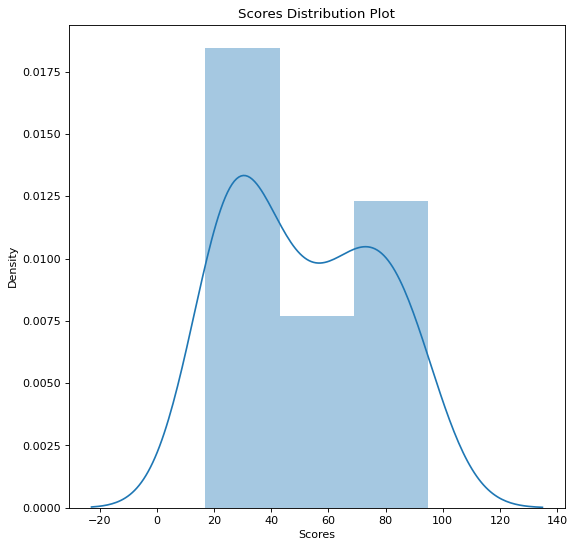

In [23]:
#Check for linearity of target variable
plt.figure(figsize=(8,8), dpi=80)
sns.distplot(df['Scores'])
plt.title('Scores Distribution Plot')
plt.show()

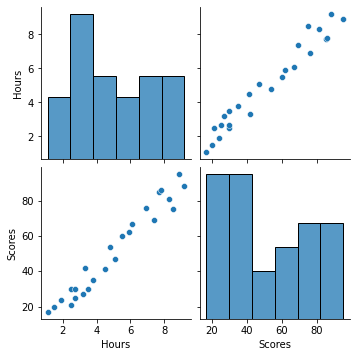

In [24]:
sns.pairplot(df)

## **Model Building**

In [25]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1050)

In [50]:
dtclassifier = LinearRegression()

param_grid = {'fit_intercept' : [True, False],
              'n_jobs' : [1,2,3,4,5,6,7,8,9,10]
              }

grid = GridSearchCV(estimator = dtclassifier, param_grid = param_grid, refit = True, verbose = 0)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print("Best Parameters after Hyperparameter Tuning: \n", grid.best_params_)
print("Best Estimators after Hyperparameter Tuning: \n", grid.best_estimator_)
print("Best Score after Hyperparameter Tuning: \n", grid.best_score_)

Best Parameters after Hyperparameter Tuning: 
 {'fit_intercept': False, 'n_jobs': 1}
Best Estimators after Hyperparameter Tuning: 
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
Best Score after Hyperparameter Tuning: 
 0.9062996023180705


In [53]:
lr = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## **Illustrating Line of Best Fit**

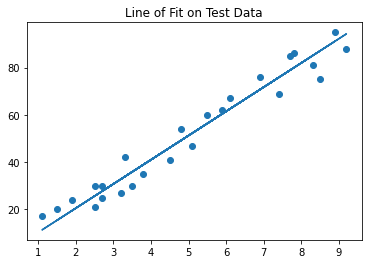

In [54]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title("Line of Fit on Test Data")
plt.plot(X, line);
plt.show()

## **Validating on Test Data**

In [55]:
y_pred = lr.predict(X_test)

In [56]:
#Compare actual vs predicted

comp = pd.DataFrame({'Actual:' : y_test, 'Prediction': y_pred})
comp

,Actual:,Prediction
0,69.0,75.857510
1,76.0,70.732003
2,75.0,87.133627
3,41.0,46.129567
4,30.0,25.627537
5,85.0,78.932815
6,54.0,49.204872


## **Model Evaluation**

In [57]:
def mean_absolute_percentage_error(actual, prediction):
    actual, prediction = np.array(actual), np.array(prediction)
    return (np.mean(np.abs(actual - prediction) / actual) * 100)

In [58]:
def model_evaluation(y_test, y_pred):
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))


In [59]:
model_evaluation(y_test, y_pred)

Mean Squared Error: 46.7481459088595
Mean Absolute Error: 6.37478251881966
Mean Absolute Percentage Error: 10.878844616252746


## **Testing with Sample Question**

In [60]:
hours = 9.25
hour = np.reshape(hours, (-1, 1))
own_pred = lr.predict(hour)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.82188793761804


In [61]:
import joblib
joblib.dump(lr, 'ScorePredModel.pkl')


['ScorePredModel.pkl']